In [19]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

%matplotlib inline

In [11]:
data = pd.read_csv('dummy_data.csv')
data = data.drop(['Unnamed: 0'], axis = 1)
data.head()

,zipcodes,income,food,essentials,IEE
0,10024,2637,1061,1089,486
1,94016,4601,2038,526,2035
2,22031,4596,1601,2606,388
3,10024,10605,3011,4049,3543
4,60007,12360,2379,5204,4776


In [18]:
unique_zipcodes = data['zipcodes'].unique()
data = pd.concat([data, pd.get_dummies(pd.Series(data['zipcodes']))], axis=1).drop(['zipcodes'], axis=1)
data.head()

,income,food,essentials,IEE,10024,22031,44101,60007,94016
0,2637,1061,1089,486,1,0,0,0,0
1,4601,2038,526,2035,0,0,0,0,1
2,4596,1601,2606,388,0,1,0,0,0
3,10605,3011,4049,3543,1,0,0,0,0
4,12360,2379,5204,4776,0,0,0,1,0


In [21]:
data_food = data.drop(['essentials', 'IEE'], axis=1)
data_essentials = data.drop(['food', 'IEE'], axis=1)
data_iee = data.drop(['food', 'essentials'], axis=1)

In [23]:
all_data = [data_food, data_essentials, data_iee]
all_data[1].head()

,income,essentials,10024,22031,44101,60007,94016
0,2637,1089,1,0,0,0,0
1,4601,526,0,0,0,0,1
2,4596,2606,0,1,0,0,0
3,10605,4049,1,0,0,0,0
4,12360,5204,0,0,0,1,0


In [86]:
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_food.drop(['food'], axis=1), all_data[0]['food'], test_size=0.1, random_state=13)
X_train.head()

,income,10024,22031,44101,60007,94016
1257,2053,0,0,1,0,0
7396,10689,0,1,0,0,0
793,1375,0,0,0,0,1
4957,11656,0,1,0,0,0
9719,11323,1,0,0,0,0


In [78]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train['scaled_income'] = scaler.transform(X_train)[:,0]
X_train.drop(['income'], axis=1, inplace=True)
X_train.head()

,10024,22031,44101,60007,94016,scaled_income
1257,0,0,1,0,0,-1.380327
7396,0,1,0,0,0,1.190328
793,0,0,0,0,1,-1.582146
4957,0,1,0,0,0,1.478173
9719,1,0,0,0,0,1.379049


In [79]:
clf = LinearRegression()
clf.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [80]:
X_test['scaled_income'] = scaler.transform(X_test)[:,0]
X_test.drop(['income'], axis=1, inplace=True)
X_test.head()

,10024,22031,44101,60007,94016,scaled_income
5952,1,0,0,0,0,0.476820
1783,0,0,0,1,0,1.561817
4811,1,0,0,0,0,-0.184895
145,0,0,1,0,0,1.302549
7146,0,0,0,1,0,-0.835298


In [82]:
preds= clf.predict(X_test)
preds

array([2775.40625, 4027.875  , 2030.4375 , 3705.1875 , 1329.21875,
       3952.65625, 1970.65625, 1022.1875 , 3864.28125, 1622.84375,
       2565.53125, 2946.3125 , 3088.71875, 1846.625  , 2233.625  ,
       3484.34375, 1531.03125,  576.71875, 1602.0625 , 3032.     ,
       3403.5    , 1501.15625,  512.625  , 4074.15625, 4100.59375,
       3740.375  , 3979.375  , 3156.28125, 3251.9375 , 1257.84375,
        458.53125,  532.8125 , 2798.34375, 3783.     , 3124.09375,
        852.1875 ,  755.53125, 3642.     , 1291.34375, 1367.59375,
        583.1875 , 2393.8125 ,  622.40625, 2077.53125, 2700.53125,
       2298.6875 ,  433.625  , 1908.96875,  397.4375 , 1752.96875,
       2850.375  ,  782.96875, 3001.78125,  527.03125,  588.875  ,
       4201.75   ,  699.03125, 2306.4375 , 3430.96875, 1838.40625,
       2619.4375 , 1405.5625 , 2813.4375 , 2313.46875, 1556.15625,
       2578.1875 , 3175.96875, 3825.5    , 3658.75   , 3484.0625 ,
       3409.9375 , 2887.5625 , 1197.     ,  460.65625, 2457.15

In [87]:
#tensorflow

mean = X_train['income'].mean(axis=0)
std = X_train['income'].std(axis=0)
X_train['income'] = (X_train['income'] - mean) / std
X_test['income'] = (X_test['income'] - mean) / std

X_train.head()

,income,10024,22031,44101,60007,94016
1257,-1.380250,0,0,1,0,0
7396,1.190262,0,1,0,0,0
793,-1.582058,0,0,0,0,1
4957,1.478090,0,1,0,0,0
9719,1.378973,1,0,0,0,0


In [89]:
from tensorflow import keras


model = keras.Sequential()
model.add(keras.layers.Dense(64, activation='relu',input_shape=(X_train.shape[1],)))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(1)) # no activation: this is regression

model.compile(loss='mse',
                optimizer='rmsprop',
                metrics=['mae'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                448       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 4,673
Trainable params: 4,673
Non-trainable params: 0
_________________________________________________________________


In [90]:
# Training

# Display training progress by printing a single dot for each completed epoch.
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

# Store training stats
history = model.fit(X_train, y_train, epochs=500,
                    validation_split=0.2, verbose=0,
                    callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................

(0, 3000)

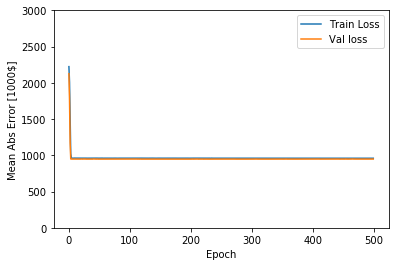

In [95]:
plt.figure()
plt.xlabel('Epoch')
plt.ylabel('Mean Abs Error [1000$]')
plt.plot(history.epoch, np.array(history.history['mean_absolute_error']), 
       label='Train Loss')
plt.plot(history.epoch, np.array(history.history['val_mean_absolute_error']),
       label = 'Val loss')
plt.legend()
plt.ylim([0,3000])

In [120]:
aa = np.array([[0], [0], [0], [0], [0], [0]])
print(aa.shape)
test_predictions = model.predict(pd.DataFrame([[0,0,0,0,0,0]])).flatten()

test_predictions[0]

(6, 1)


1643.6792

In [97]:
model.save()

TypeError: save() missing 1 required positional argument: 'filepath'

In [118]:
pd.DataFrame([[0,0,0,0,0,0]])

,0,1,2,3,4,5
0,0,0,0,0,0,0
